In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
df = pd.read_csv("/Users/olenka1/PycharmProjects/DS_Part2/bestsellers with categories.csv")


In [176]:
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df.head(5))
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df.shape)
# Відповідь - якщо не вказувати явно то 10 В даному випадку оскільки ми вказали shape(5) буде 5


<-------------------------------------------------------------------------------------------->

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

<-------------------------------------------------------------------------------------------->

(

In [177]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [178]:
print(df.isna().sum())
# Відповідь Пропусків немає

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [179]:
unique_genres = df["genre"].unique()
print(unique_genres)
# Унікальні жанри 'Non Fiction', 'Fiction'

['Non Fiction' 'Fiction']


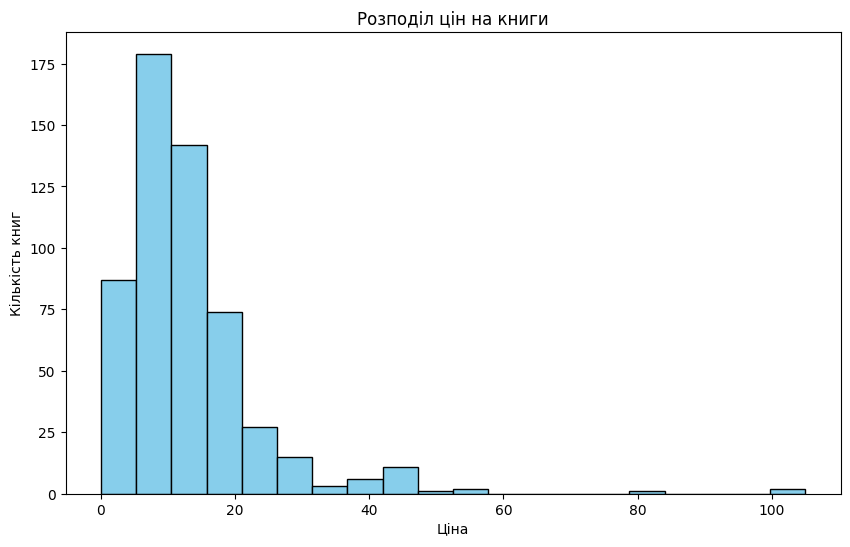

In [180]:
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

In [181]:
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df[["price"]].min())
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df[["price"]].max())
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df[["price"]].mean())
print("\n<-------------------------------------------------------------------------------------------->\n")
print(df[["price"]].median())


<-------------------------------------------------------------------------------------------->

price    0
dtype: int64

<-------------------------------------------------------------------------------------------->

price    105
dtype: int64

<-------------------------------------------------------------------------------------------->

price    13.1
dtype: float64

<-------------------------------------------------------------------------------------------->

price    11.0
dtype: float64


In [182]:
# Мінімальна ціна 0, максимальна 105, Середня 13.1, медіана 11

In [183]:
df[["user_rating"]].max()

user_rating    4.9
dtype: float64

In [184]:
df["user_rating"].value_counts()

user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

In [185]:
# Відповідь 52 Книги з рейтингом 4.9

In [186]:
max_review = df["reviews"].values.max()
indx = df["reviews"].idxmax()  # indx with max values
author = df.loc[indx, "author"]
name = df.loc[indx, "name"]
print(f" Author: {author}, Name book: {name}, Reviews: {max_review}")

 Author: Delia Owens, Name book: Where the Crawdads Sing, Reviews: 87841


In [187]:
# Найбільше відгуків має книга "Where the Crawdads Sing" "Де співають Кроуди"

In [188]:
idx = (df['year'] == 2015).idxmax()
result = df.loc[idx, ["author"]]
print(result)

author    Blue Star Coloring
Name: 16, dtype: object


In [189]:
# Найдороща книга "Blue Star Coloring"

In [190]:
fiction = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print(len(fiction))

20


In [191]:
# 20 книг жанру Fiction потрапили до топ 50 у 2010 році.

In [198]:
top_books = df[(df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))]
print(len(top_books))

1


In [199]:
# Одна книга за 2010 - 2011 рік попала в рейтинг топ 50

In [205]:
forgotten_books = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by="price")
print(forgotten_books)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [206]:
# Остання книга у відсортованому списку "Old School (Diary of a Wimpy Kid #10) Jeff Kinney

In [210]:
max_and_min = df.groupby("genre")["price"].agg(['min', 'max']).reset_index()
print(max_and_min)

         genre  min  max
0      Fiction    0   82
1  Non Fiction    0  105


In [211]:
# Мінімальна ціна для ДФ Fiction 0, Максимальна 82
# Мінімальна ціна для ДФ Non Fiction 0, Максимальна 105

In [235]:
books = df.groupby("author").agg(total=('name', 'count')).reset_index()
print(books.max())
print(books)


author    Zhi Gang Sha
total               12
dtype: object
                         author  total
0              Abraham Verghese      2
1                Adam Gasiewski      1
2                 Adam Mansbach      1
3                     Adir Levy      1
4    Admiral William H. McRaven      1
..                          ...    ...
243             Walter Isaacson      3
244               William Davis      2
245            William P. Young      2
246            Wizards RPG Team      3
247                Zhi Gang Sha      2

[248 rows x 2 columns]


In [236]:
# Розмірність таблиці 248 рядків 2 стовпчика 

In [237]:
# Найбільше книг має автор Zhi Gang Sha 12 книг

In [252]:
mean_authors = df.groupby("author").agg(midl_rating=('user_rating', 'mean')).reset_index()
print(mean_authors.round(2))
print(mean_authors.round(2).min())

                         author  midl_rating
0              Abraham Verghese         4.60
1                Adam Gasiewski         4.40
2                 Adam Mansbach         4.80
3                     Adir Levy         4.80
4    Admiral William H. McRaven         4.70
..                          ...          ...
243             Walter Isaacson         4.57
244               William Davis         4.40
245            William P. Young         4.60
246            Wizards RPG Team         4.80
247                Zhi Gang Sha         4.60

[248 rows x 2 columns]
author         Abraham Verghese
midl_rating                 3.9
dtype: object


In [253]:
# Мінімальний рейтинг у Abraham Verghese 3.9 

In [260]:
join_df = pd.concat([books.set_index("author"), mean_authors.set_index("author")], axis=1, join="inner").reset_index().sort_values(by=["total", "midl_rating"], ascending=[True, True]) 
print(join_df.round(2).reset_index())

     index                              author  total  midl_rating
0      171                      Muriel Barbery      1         4.00
1       43                        Chris Cleave      1         4.10
2      109                   Ian K. Smith M.D.      1         4.10
3      186                        Pierre Dukan      1         4.10
4       81                    Elizabeth Strout      1         4.20
..     ...                                 ...    ...          ...
243     11  American Psychological Association     10         4.50
244    226                     Suzanne Collins     11         4.66
245     92                        Gary Chapman     11         4.74
246    197                        Rick Riordan     11         4.77
247    120                         Jeff Kinney     12         4.80

[248 rows x 4 columns]


In [259]:
# Перший у списку  Muriel Barbery 

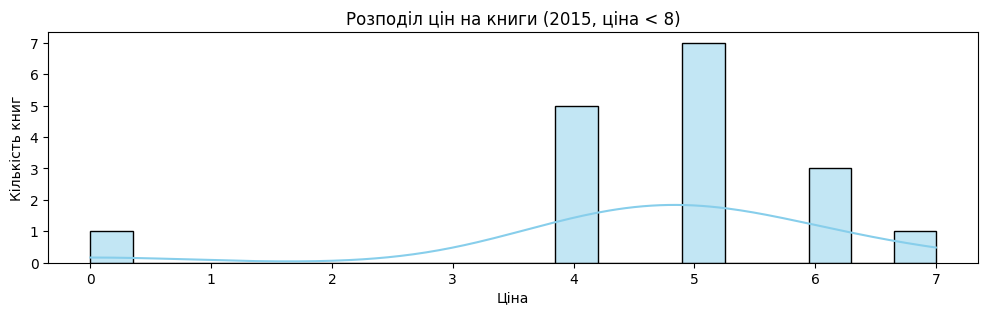

In [274]:
plt.figure(figsize=(12, 3))
sns.histplot(data=forgotten_books, x='price', bins=20, kde=True, color='skyblue')
plt.title('Розподіл цін на книги (2015, ціна < 8)')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

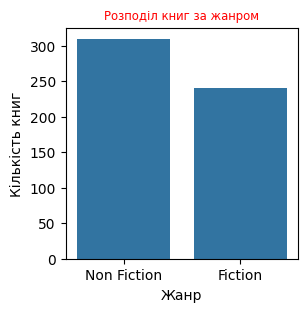

In [280]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='genre')
plt.title('Розподіл книг за жанром', fontsize='small', color='red')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.show()

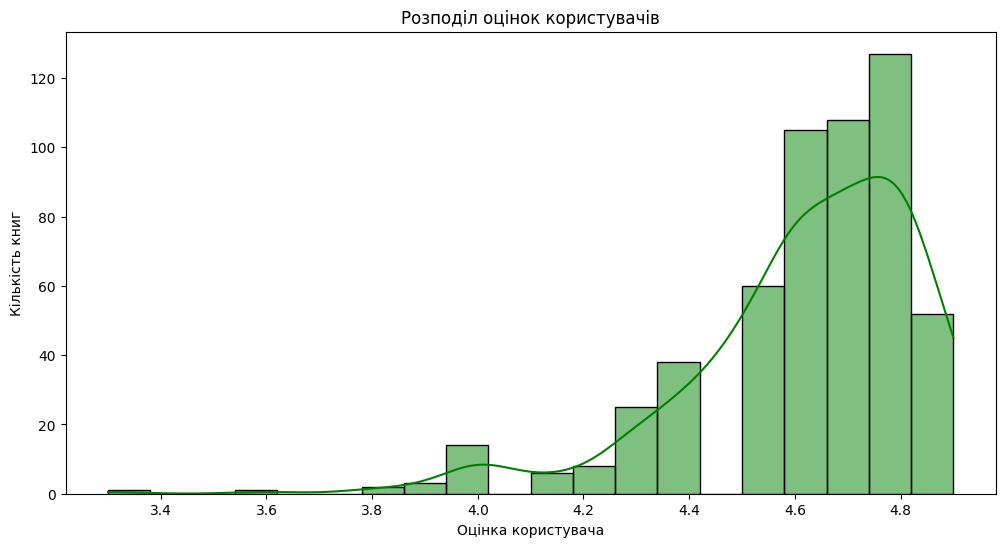

In [265]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='user_rating', bins=20, kde=True, color='green')
plt.title('Розподіл оцінок користувачів')
plt.xlabel('Оцінка користувача')
plt.ylabel('Кількість книг')
plt.show()

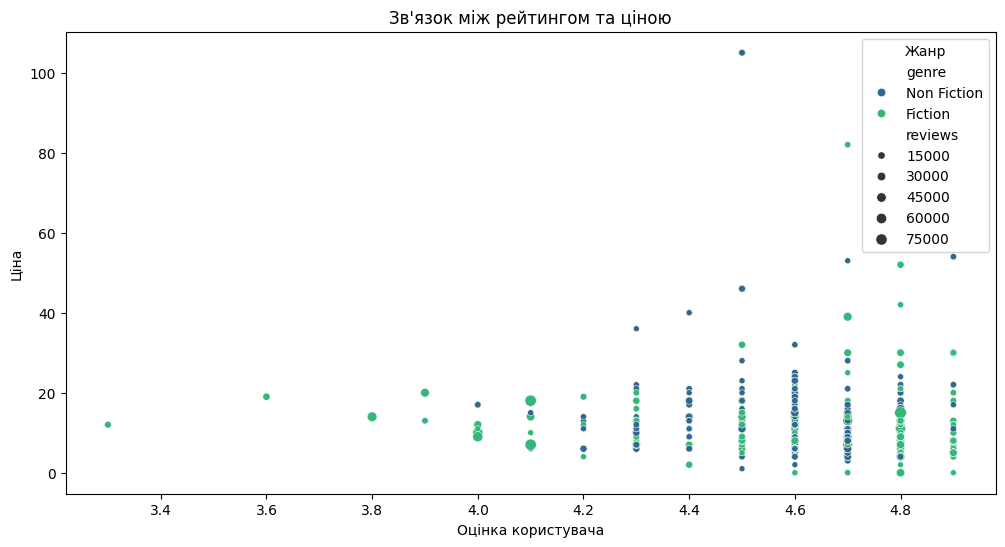

In [266]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='user_rating', y='price', hue='genre', palette='viridis', size='reviews')
plt.title('Зв\'язок між рейтингом та ціною')
plt.xlabel('Оцінка користувача')
plt.ylabel('Ціна')
plt.legend(title='Жанр')
plt.show()
